In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [35]:
dataframe = pd.read_csv("student-por.csv")

In [36]:
dataframe.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [37]:
dataframe.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [38]:
dataframe = dataframe.drop(columns = ['sex', 'school', 'famsize', 'Mjob', 'Fjob', 'Medu', 'Fedu', 'Dalc', 'Walc'])
dataframe.head(10)

,age,address,Pstatus,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,18,U,A,course,mother,2,2,0,yes,no,...,no,no,4,3,4,3,4,0,11,11
1,17,U,T,course,father,1,2,0,no,yes,...,yes,no,5,3,3,3,2,9,11,11
2,15,U,T,other,mother,1,2,0,yes,no,...,yes,no,4,3,2,3,6,12,13,12
3,15,U,T,home,mother,1,3,0,no,yes,...,yes,yes,3,2,2,5,0,14,14,14
4,16,U,T,home,father,1,2,0,no,yes,...,no,no,4,3,2,5,0,11,13,13
5,16,U,T,reputation,mother,1,2,0,no,yes,...,yes,no,5,4,2,5,6,12,12,13
6,16,U,T,home,mother,1,2,0,no,no,...,yes,no,4,4,4,3,0,13,12,13
7,17,U,A,home,mother,2,2,0,yes,yes,...,no,no,4,1,4,1,2,10,13,13
8,15,U,A,home,mother,1,2,0,no,yes,...,yes,no,4,2,2,1,0,15,16,17
9,15,U,T,home,mother,1,2,0,no,yes,...,yes,no,5,5,1,5,0,12,12,13


In [39]:
dataframe.isna().any()

age           False
address       False
Pstatus       False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [40]:
dataframe.dtypes

age            int64
address       object
Pstatus       object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Let's start creating some visualizations! In the first graph, I have made a simple line plot of a students study time compared to their final grade. In regards to the study time scale, 1.0 is less than 2 hours, 2 is 2 - 5 hours, 3 is 5 - 10 hours, and 4 is greater than 10 hours.

Text(0.5, 1.0, 'Line Plot for Studytime vs Final Grade')

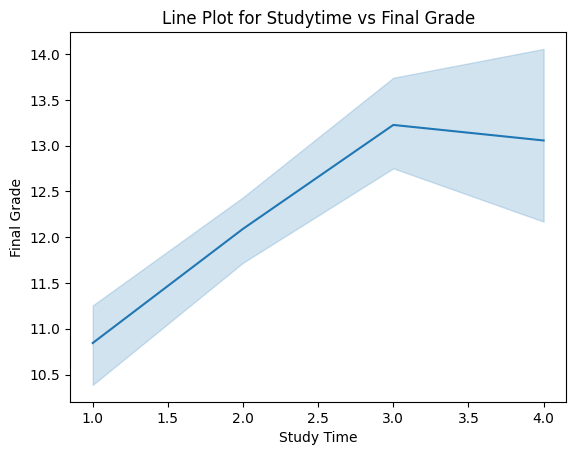

In [51]:
ax = sb.lineplot(data = dataframe, x = 'studytime', y = 'G3')
ax.set_xlabel('Study Time')
ax.set_ylabel('Final Grade')
plt.title(label = 'Line Plot for Studytime vs Final Grade')

It seems that students who student for longer have better grades. However, it seems to plateau around the 3.0 mark, so maybe there is not much advantage to studying for more than 5 - 10 hours. Next, let's compare absences to final grades using a bar plot.

Text(0.5, 1.0, 'Bar Plot for Number of Absences vs Final Grade')

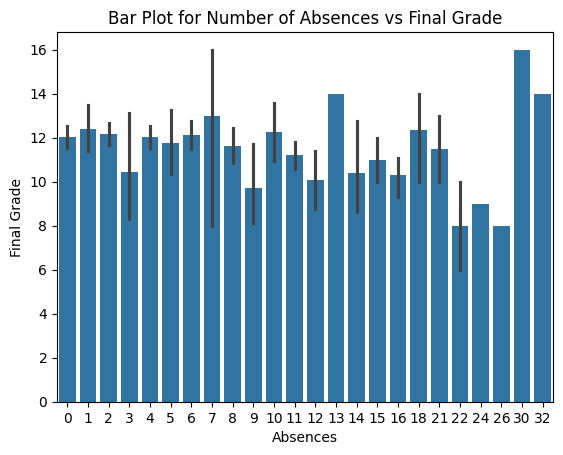

In [52]:
ax = sb.barplot(data = dataframe, x = 'absences', y = 'G3')
ax.set_xlabel('Absences')
ax.set_ylabel('Final Grade')
plt.title('Bar Plot for Number of Absences vs Final Grade')

This is very surprising. It seems that absences don't really affect final grades that much. We can see that most final grades fall in the range of 10 - 12 regardless of number of absences. However, absences in the twenties seemed to result in a much lower final grade, then students who missed 30 days or more ended up with the best grades. What about first period grades vs absences?

Text(0.5, 1.0, 'Bar Plot for Number of Absences vs First Period Grade')

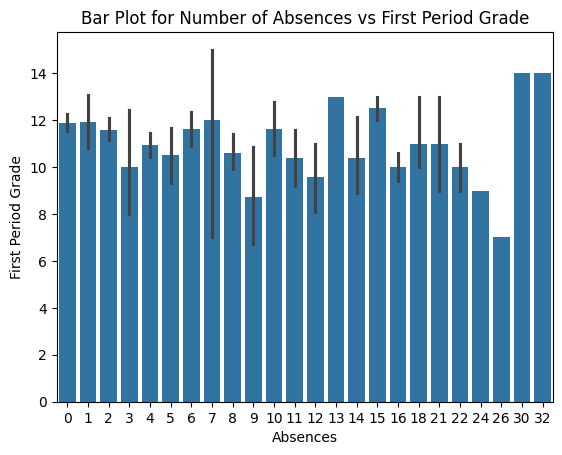

In [53]:
ax = sb.barplot(data = dataframe, x = 'absences', y = 'G1')
ax.set_xlabel('Absences')
ax.set_ylabel(ylabel = 'First Period Grade')
plt.title('Bar Plot for Number of Absences vs First Period Grade')

Surprisingly, not that different. Next, let's check quality of family relationships vs final grade. In regards to the family relationship scale, 1 is very poor, and 5 is very good.

Text(0.5, 1.0, 'Line Plot for Family Relationship Quality vs Final Grade')

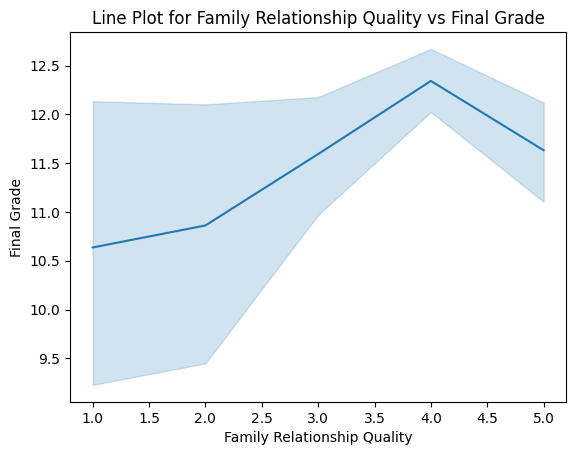

In [54]:
ax = sb.lineplot(data = dataframe, x = 'famrel', y = 'G3', )
ax.set_xlabel('Family Relationship Quality')
ax.set_ylabel('Final Grade')
plt.title(label = 'Line Plot for Family Relationship Quality vs Final Grade')

This is also surprising. I really would've thought that better family relationships would have resulted in better grades. It seems that students that have somewhat good family relationships are doing the best.

Let's compare the final gades of students who do not have internet access vs those who do have internet.

Text(0.5, 1.0, 'Point Plot of Final Grades')

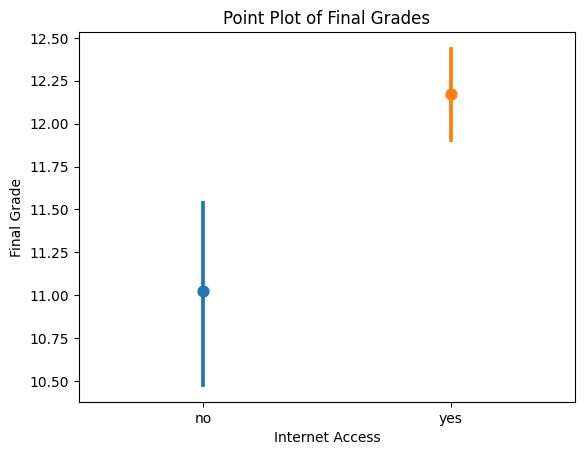

In [57]:
ax = sb.pointplot(data = dataframe, x = 'internet', y = 'G3', hue = 'internet')
ax.set_xlabel('Internet Access')
ax.set_ylabel('Final Grade')
plt.title('Point Plot of Final Grades')

Looks like students who have internet access at home end up with much better grades than students who do not. Even the range of grades is smaller.